## 시각화 라이브러리, Seaborn

 <img src="https://seaborn.pydata.org/_images/logo-tall-lightbg.svg" width="300" align="right">


<br><br> <br><br> 

스크래핑을 해서 결과를 가독성 좋게! 정리를 해야 무언가 인사이트를 얻을 수 있을 것이다!  

--> 시각화가 해답이다 📊  



파이썬의 데이터 시각화 라이브러리.  

이를 기반으로 다양하고 수려한 그래프를 그릴 수 있다!  

그 중 가장 자주 사용되는 꺾은선그래프와 막대그래프를 그려본다. 



### 0. Seaborn 설치

In [ ]:
# %pip install Seaborn

### 1. 라이브러리 불러오기

In [1]:
import seaborn as sns

### 2. 그래프 그려보기
#### 2-1. 꺾은선 그래프 (Line Plot)

두 변수의 값에 따른 추이를 선으로 이은 그래프.  

`sns.lineplot()`


/Users/jiwookim/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

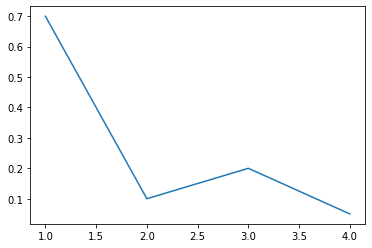

In [5]:
x=[1,3,2,4]
y=[0.7, 0.2, 0.1, 0.05]

sns.lineplot(x,y)

#### 2-2. 막대 그래프 (Bar Plot)

범주형 데이터의 "값"과 그 크기를 직사각형으로 나타낸 그래프.  

`sns.barplot()`

/Users/jiwookim/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

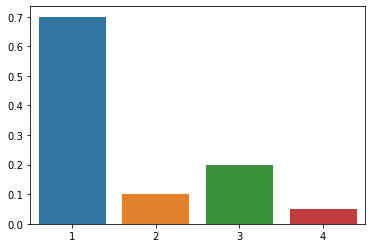

In [7]:
sns.barplot(x,y)

범주형 데이터를 나타낼 수 있기 때문에 x가 str list여도 가능.

/Users/jiwookim/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

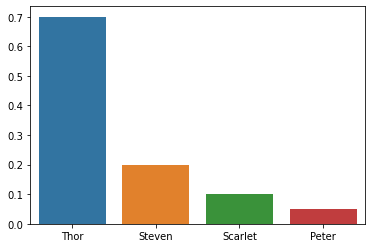

In [10]:
x=["Thor", "Steven", "Scarlet", "Peter"]

sns.barplot(x,y)

#### 2-3. Plot의 속성 설정하기
`seaborn`은 파이썬의 시각화 라이브러리 `matplotlib`을 기반으로 만들어졌다.  

`matplotlib.pyplot`의 속성을 변경해 그래프에 다양한 요소를 변경/ 추가할 수 있다.  

##### 2-3-1.  `matplotlib.pyplot` 불러오기

In [12]:
import matplotlib.pyplot as plt

#### 2-3-2. 제목 붙이기  `plt.title( )`

/Users/jiwookim/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


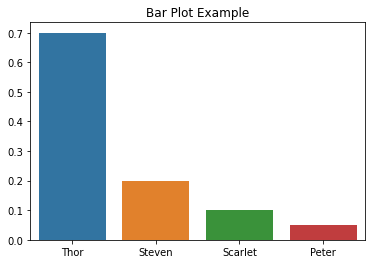

In [14]:
sns.barplot(x, y)
plt.title("Bar Plot Example")

plt.show()

#### 2-3-3. 그래프 축에 설명 붙이기  `plt.<axis>label( )`

/Users/jiwookim/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


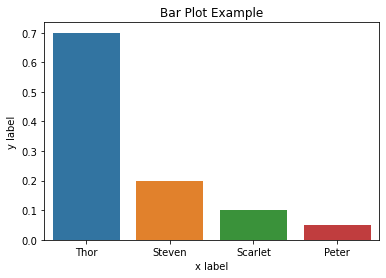

In [16]:
sns.barplot(x, y)
plt.title("Bar Plot Example")

plt.xlabel("x label")
plt.ylabel("y label")

plt.show()

#### 2-3-4. 그래프 축의 범위 설정하기  `plt.<axis>lim( )`

/Users/jiwookim/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


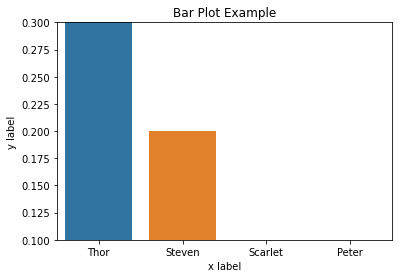

In [20]:
sns.barplot(x, y)
plt.title("Bar Plot Example")

plt.xlabel("x label")
plt.ylabel("y label")

plt.ylim(0.1,0.3)

plt.show()

#### 2-3-5. 그래프의 크기 설정하기 `plt.figure( figsize= (x,y) )`

/Users/jiwookim/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


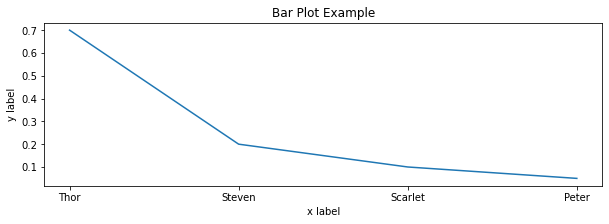

In [23]:
plt.figure(figsize=(10,3))
sns.lineplot(x, y)
plt.title("Bar Plot Example")

plt.xlabel("x label")
plt.ylabel("y label")


plt.show()

-----
### 3. 스크래핑 결과 시각화하기 I

<span style="font-size:18px"> Target: 기상청에서 기온 스크래핑 \& 시각화 </span>  

다음 사이트에 Selenium 이용해 날씨 정보 가져오자 https://www.weather.go.kr/w/weather/forecast/short-term.do  

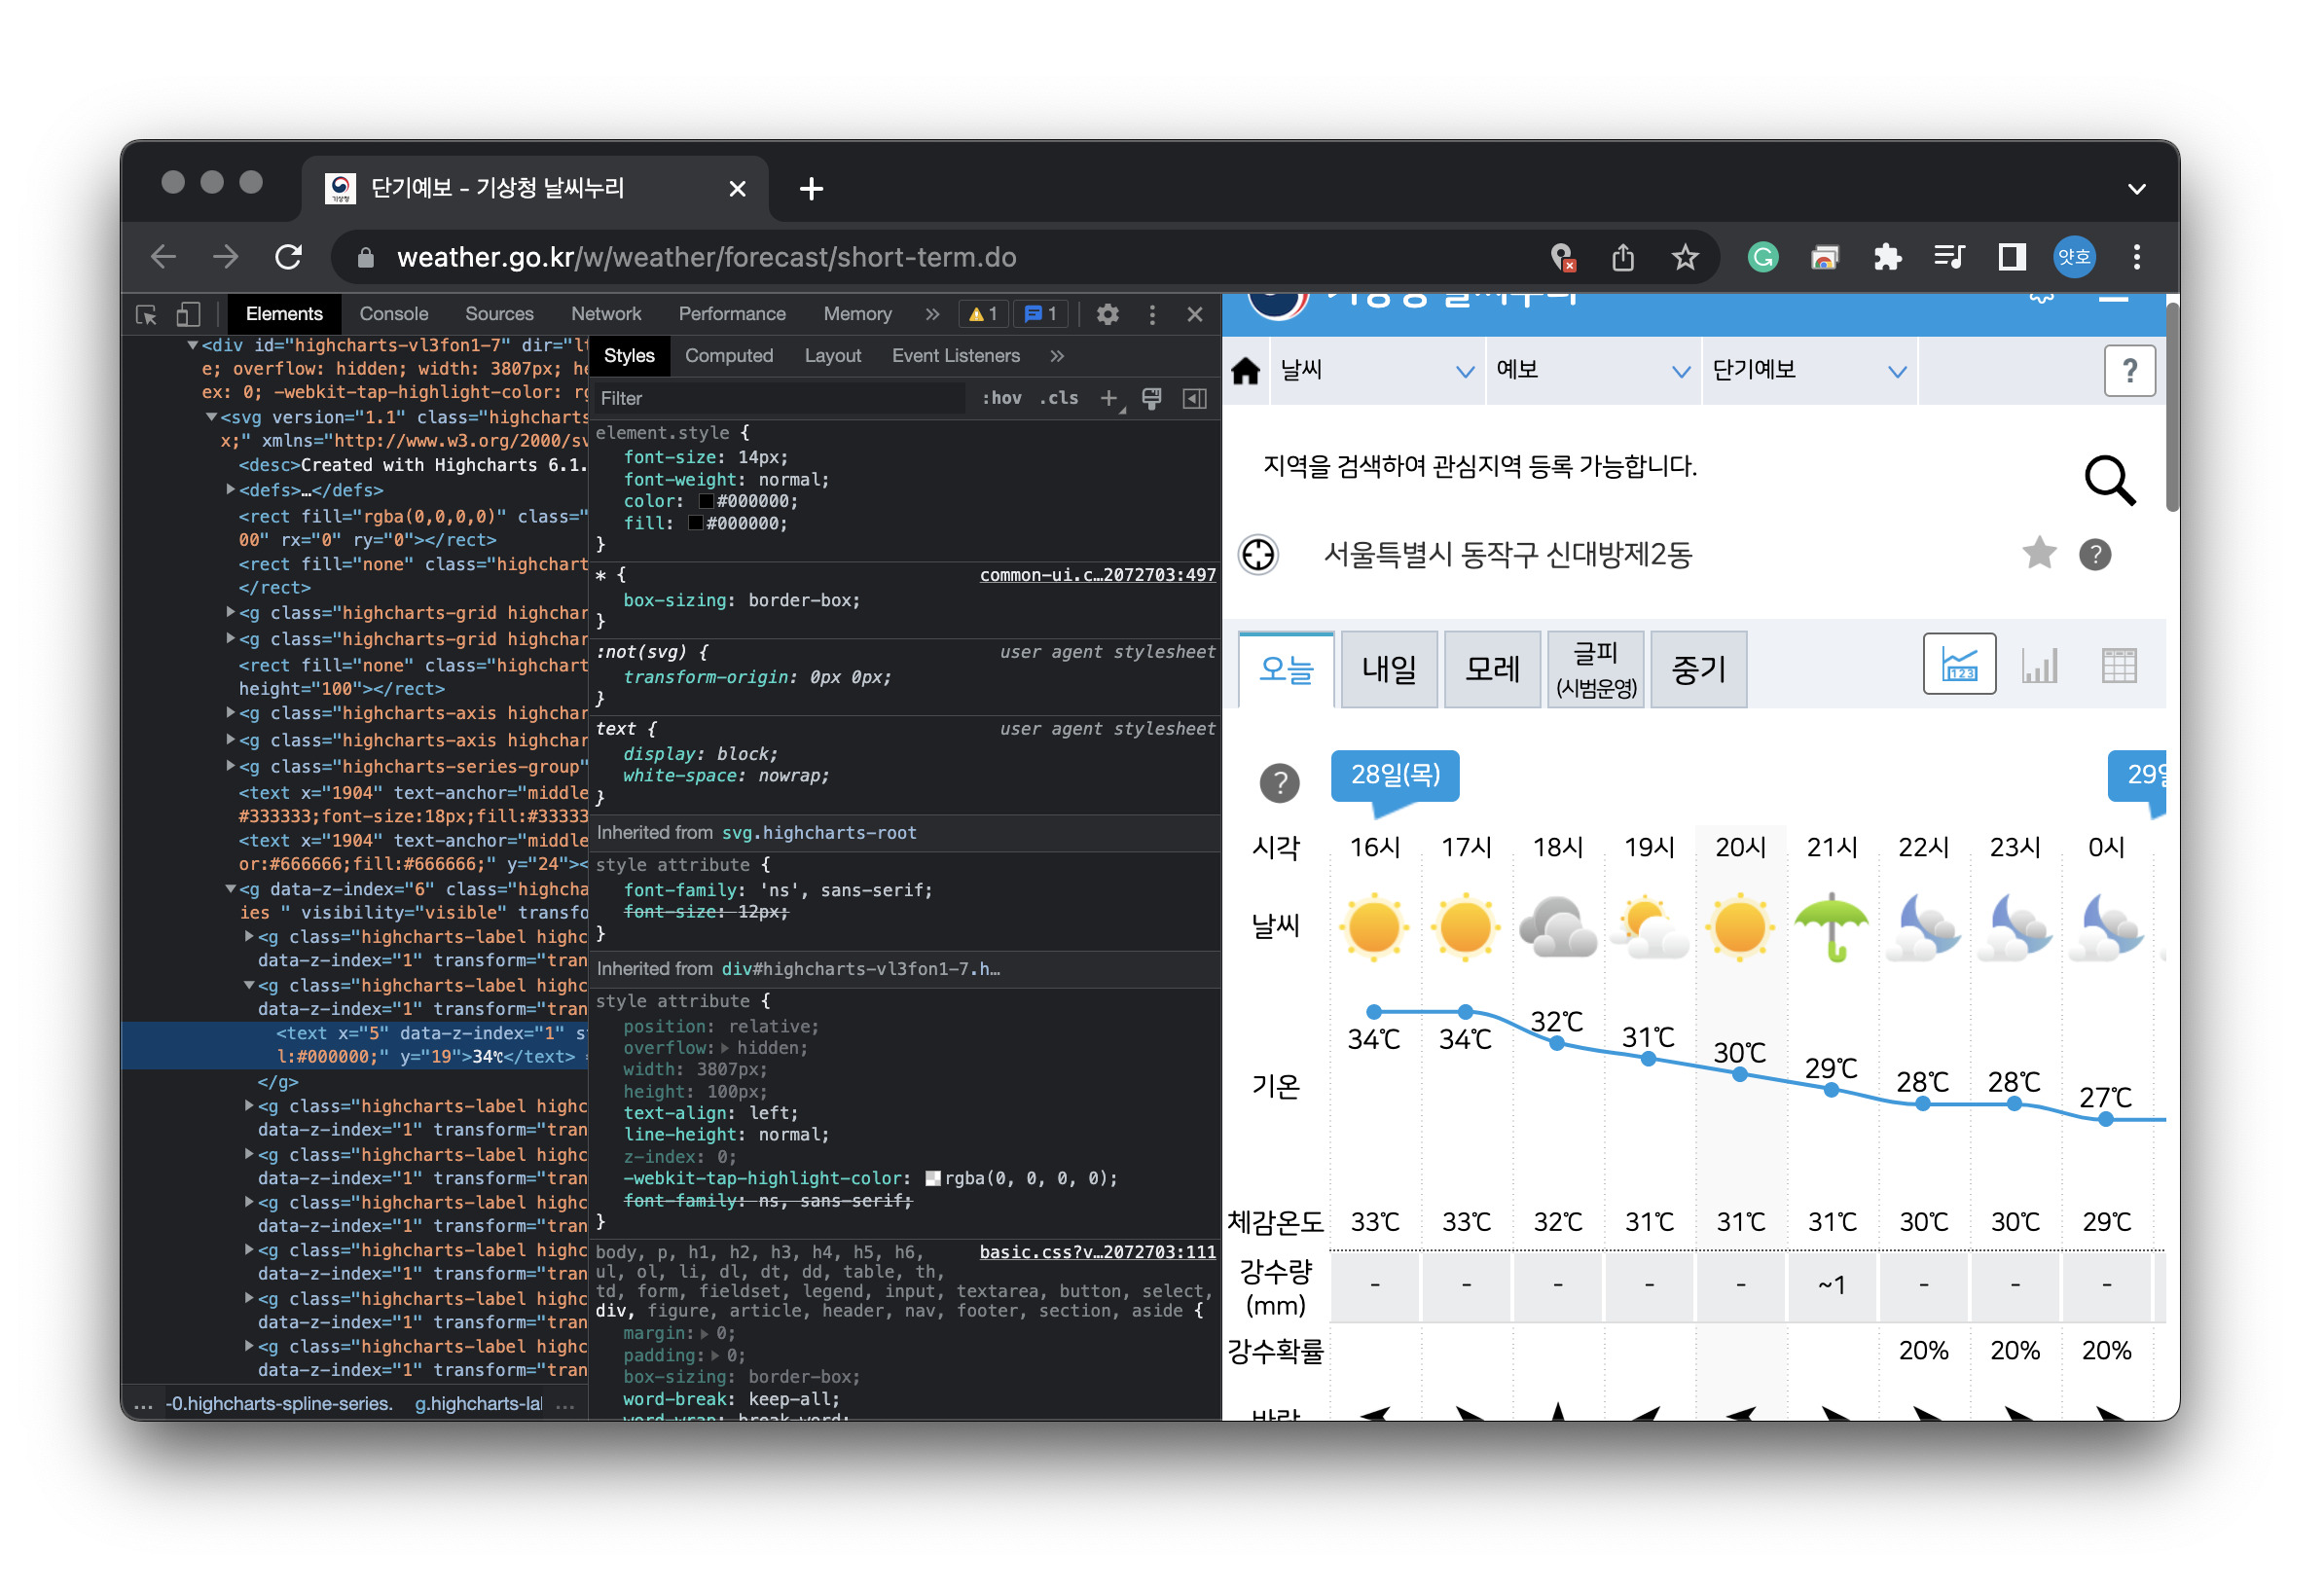  

타겟 데이터의  

- XPath는 `//*[@id="highcharts-vl3fon1-7"]/svg/g[6]/g[2]/text`.
- 상위 클래스의 id는 "my-tchart"
    

<br><br>

#### 3-0. 스크래핑에 필요한 라이브러리 불러오기

In [25]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from webdriver_manager.chrome import ChromeDriverManager

#### 3-1. driver 이용해 해당 사이트에 요청

In [36]:
driver= webdriver.Chrome(service= Service(ChromeDriverManager().install()))

driver.get("https://www.weather.go.kr/w/weather/forecast/short-term.do")

temps= driver.find_element(By.ID, "my-tchart").text
print(temps)


34℃
34℃
32℃
31℃
30℃
29℃
28℃
28℃
27℃
27℃
27℃
26℃
26℃
26℃
26℃
26℃
27℃
28℃


#### 3-2. 응답 데이터 전처리 

응답 받은 데이터는 내가 원하는 값과 ℃이 포함된 형태이다.  

또한 리스트 형태가 아니라 그냥 줄바꿈이 끼어있는 줄 글! 그냥 string이다.  

데이터를 이용하기에 좋지 않은 형태이므로,  
 1. ℃를 그냥 공백 문자로 ("")
 2. 줄바꿈은 줄바꿈을 기준으로 분할하여 리스트 형태로,
 3. 그리고 interger형으로
 
만들어준다.



In [37]:
temps=  [int(i) for i in temps.replace("℃", "").split("\n")]
print(temps)

[34, 34, 32, 31, 30, 29, 28, 28, 27, 27, 27, 26, 26, 26, 26, 26, 27, 28]


#### 3-3. 데이터를 인사이트 얻기 적당한 타입의 그래프로 가시화 
온도 변화 추이를 보고자함이므로, line plot이 적절!

/Users/jiwookim/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


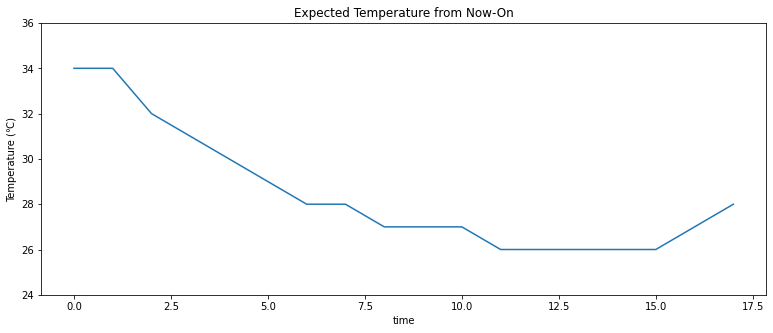

In [43]:
# import seaborn as sns
# import matplotlib.pyplot as plt

x= [i for i in range(len(temps))]

plt.figure(figsize=(13,5))

sns.lineplot(x, temps)

plt.ylim(min(temps)-2, max(temps)+2)
plt.title("Expected Temperature from Now-On")
plt.xlabel("time")
plt.ylabel("Temperature (℃)")

plt.show()

### 4. 스크래핑 결과 시각화하기 II

<span style="font-size:18px"> Target: 해시코드 질문 태그의 빈도 확인 </span>  

해시코드에는 다양한 질문이 올라오는데, 질문 제목 아래에 "태그"가 있다.  

이 태그의 빈도를 측정하면 어떤 주제의 질문이 많이 올라오는지 알 수 있을 것 이다!

https://hashcode.co.kr

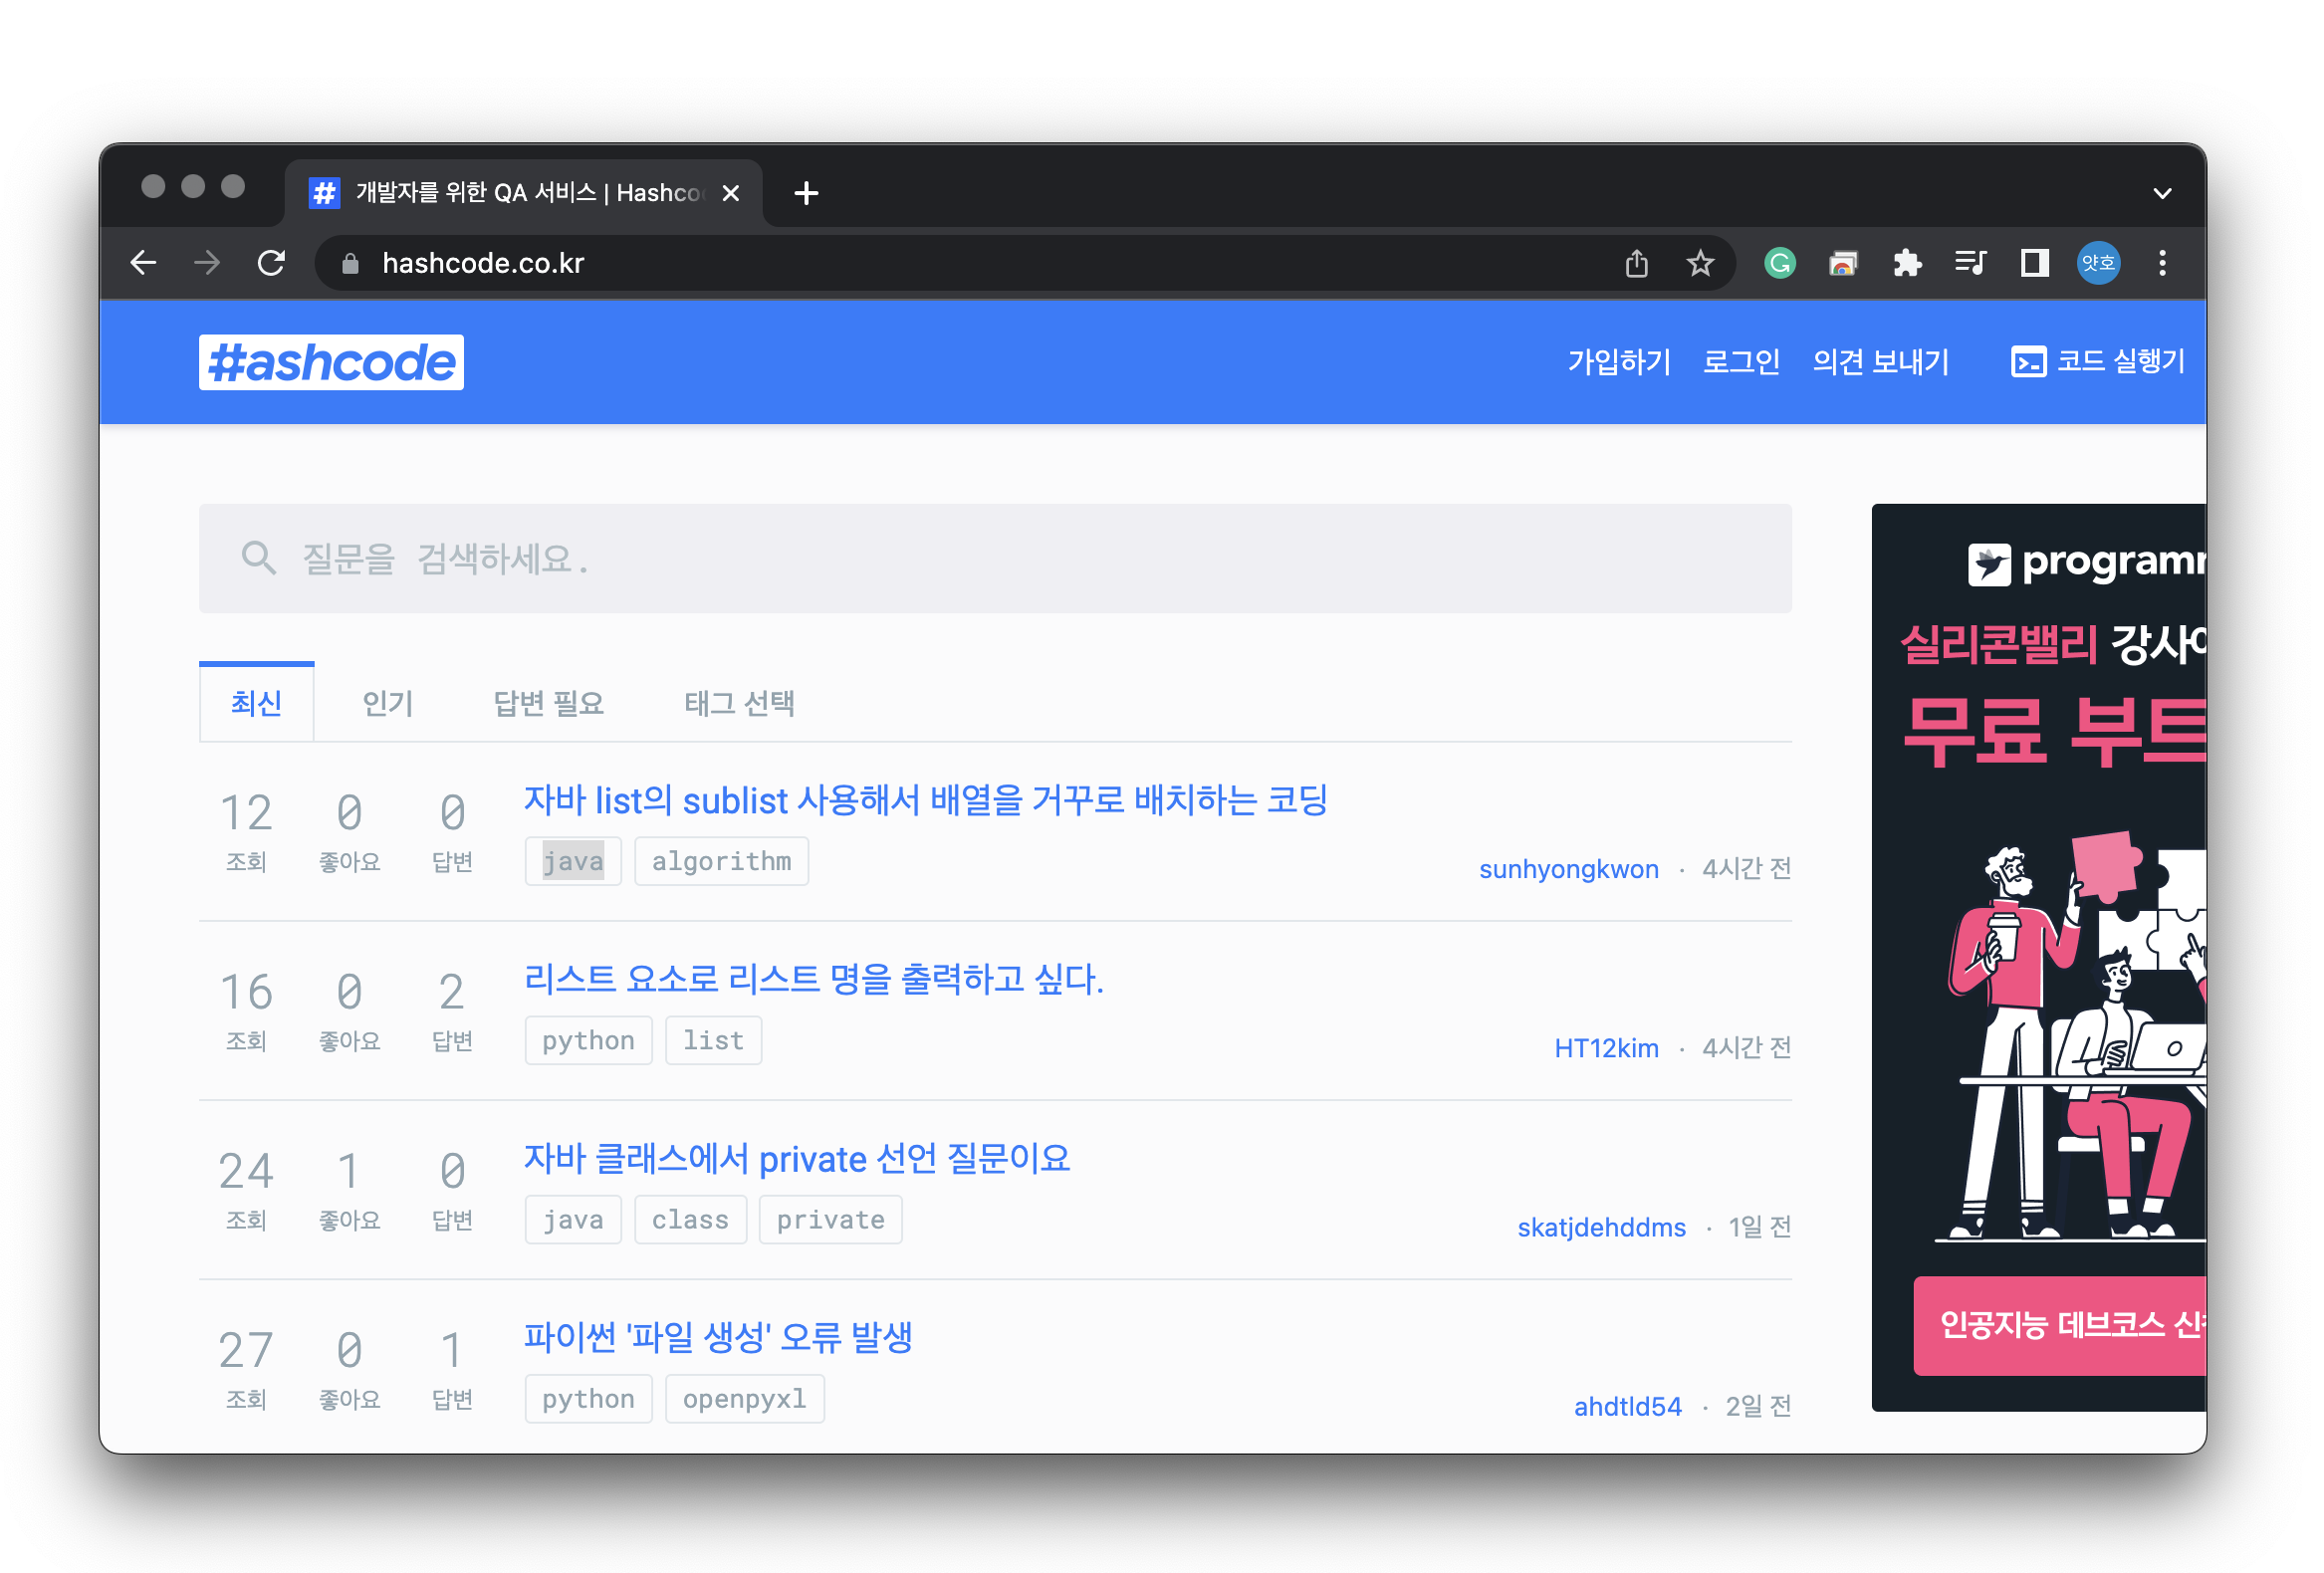


타겟 데이터의  

- XPath는 `//*[@id="question-16984"]/div[4]/ul[1]/li[1]/a`.
- html 경로는 ul 태그, 그 하위의 li 태그 안에 있음!  

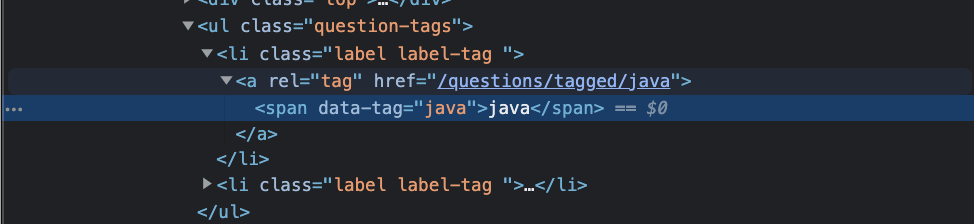  

따라서 BeutifulSoup이용해,  

1. "question-tags"라는 클래스 가진 ul 태그 찾아서,
2. 그 중 li 태그의 text 추춯  

하는 전략!
    

<br><br>

#### 4-0-1. User-Agent 추가하기

In [44]:
UA= {"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/103.0.0.0 Safari/537.36"}

#### 4-0-2. 스크래핑에 필요한 라이브러리 불러오기


In [53]:
import requests
from bs4 import BeautifulSoup

#### 4-1. 타겟 사이트에 요청 후 응답 받아 타겟 태그 count


In [58]:
import time

freq={}

for j in range(1,11): #페이지네이션: 1~10페이지까지 스크래핑
    res= requests.get("https://hashcode.co.kr/?page={}".format(j), UA)
    soup= BeautifulSoup(res.text, "html.parser")
    time.sleep(0.3)
    
    ulTags= soup.find_all("ul", "question-tags")
    for ul in ulTags:
        liTags = ul.find_all("li")

        for li in liTags:
            tag= li.text.strip()
            
            if tag not in freq:
                freq[tag] = 1
            else:
                freq[tag] += 1
    time.sleep(0.3)           

print(freq)

{'java': 33, 'algorithm': 3, 'python': 244, 'list': 14, 'class': 5, 'private': 1, 'openpyxl': 3, 'html': 5, 'css': 5, 'c#': 4, 'selenium': 11, 'web-crawling': 3, 'javascript': 11, 'python3': 3, 'selenium-webdrive': 2, 'random': 2, 'tuple': 2, 'pyinstaller': 3, 'mysql': 2, 'dataframe': 8, 'pandas': 13, 'function': 6, 'canvas': 1, 'fabric': 1, 'iterator': 1, 'c': 43, 'c++': 26, 'array': 9, 'advertisement': 1, 'node.js': 4, 'regression-analysis': 1, 'logistic-regression': 1, 'statsmodels': 1, 'oop': 1, 'program': 2, 'eclipse': 2, 'runtime-error': 1, 'dump': 1, 'flutter': 2, 'react': 2, 'webview': 1, 'error': 8, 'dev-c++': 1, 'dictionary': 5, 'qt': 2, 'qt-designer': 2, 'typescript': 2, 'environment-variables': 1, 'for': 10, 'preprocessor': 1, 'ai': 3, 'and': 1, 'tkinter': 4, 'socket': 2, 'crawling': 3, 'loops': 5, 'header': 1, 'python3.6.1': 1, 'len': 1, 'linux': 6, 'python-2.7': 2, 'application': 1, 'idle': 1, 'pointer': 3, 'while-loop': 6, 'android-studio': 7, 'server': 2, 'connect': 1, 

#### 4-2. Top 10 추리기
해시코드에 올라온 질문의 태그가 굉장히 다양하기 때문에 가장 많이 올라온 태그 top 10 뽑아본다.  



In [60]:
from collections import Counter

counter= Counter(freq)

counter.most_common(10)

[('python', 244),
 ('c', 43),
 ('java', 33),
 ('c++', 26),
 ('list', 14),
 ('pandas', 13),
 ('selenium', 11),
 ('javascript', 11),
 ('for', 10),
 ('android', 10)]

#### 4-3. Seaborn 이용해 Top10 Tags를 시각화

In [62]:
x= [e[0] for e in counter.most_common(10)]
y= [e[1] for e in counter.most_common(10)]

print('x: ',x)
print('y: ',y)

x:  ['python', 'c', 'java', 'c++', 'list', 'pandas', 'selenium', 'javascript', 'for', 'android']
y:  [244, 43, 33, 26, 14, 13, 11, 11, 10, 10]


/Users/jiwookim/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


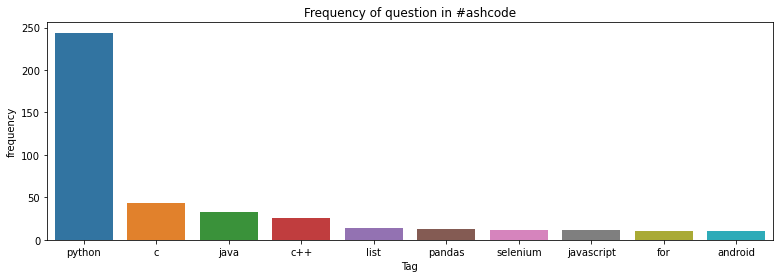

In [64]:
plt.figure(figsize=(13,4))

sns.barplot(x,y)

plt.xlabel("Tag")
plt.ylabel("frequency")
plt.title("Frequency of question in #ashcode")

plt.show()